In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import explorer as ex
import detector as dt
import detectvehicle as dv
from scipy.ndimage.measurements import label

%matplotlib inline

cars, notcars, svc, X_scaler = dv.initialize()  # Load Image 

Current working CV2 version is 3.1.0.
Loaded image count is 834, augmented to 1668 in path [./data/vehicles/GTI_Far/image*.png]
Loaded image count is 909, augmented to 1818 in path [./data/vehicles/GTI_Left/image*.png]
Loaded image count is 419, augmented to 838 in path [./data/vehicles/GTI_MiddleClose/image*.png]
Loaded image count is 664, augmented to 1328 in path [./data/vehicles/GTI_Right/image*.png]
Loaded image count is 5966, augmented to 11932 in path [./data/vehicles/KITTI_extracted/*.png]
Loaded image count is 5068, augmented to 10136 in path [./data/non-vehicles/Extras/extra*.png]
Loaded image count is 3900, augmented to 7800 in path [./data/non-vehicles/GTI/image*.png]


C:\Users\ChangHyun\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Car feature sample shape (944,)
Not Car feature sample shape (944,)
Car features count is 17584, Not Car feature counts is 17936.
Using spatial binning of: (16, 16) and 16 histogram bins.  Feature vector length: 944
204.26 Seconds to train SVC...
Test Accuracy of SVC =  0.992
My SVC predicts:  [ 1.  0.  1.  1.  1.  0.  1.  1.  0.  1.]
For these 10 labels:  [ 1.  0.  1.  1.  1.  0.  1.  1.  0.  1.]
0.03704 Seconds to predict 10 labels with SVC


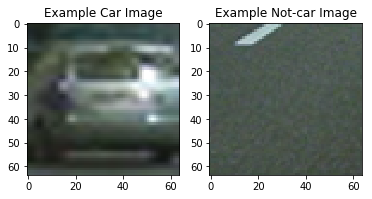

In [2]:
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = cars[car_ind]
notcar_image = notcars[notcar_ind]

# Plot the examples

fig = plt.figure()
plt.subplot(121)
plt.imshow(ex.BGR2RGB(car_image))
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(ex.BGR2RGB(notcar_image))
plt.title('Example Not-car Image')

Car image histogram...
Not Car image histogram...


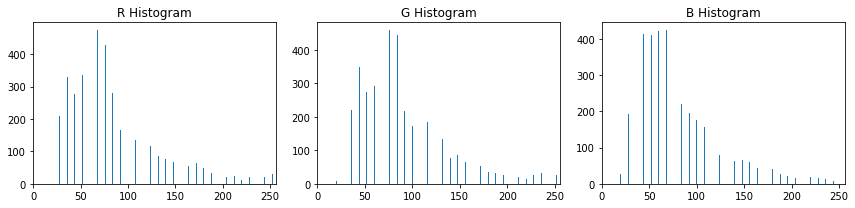

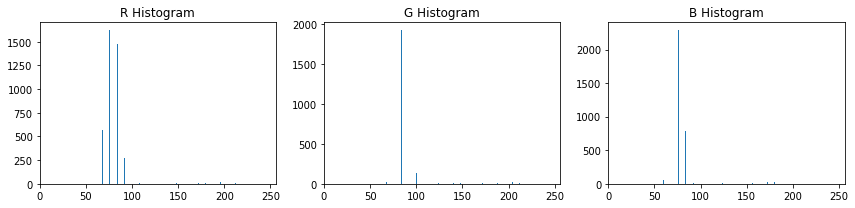

In [3]:
rh, gh, bh, bincen, feature_vec = ex.color_hist(car_image, nbins=32, bins_range=(0, 256))
# Plot a figure with all three bar charts
if rh is not None:
    print('Car image histogram...')
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')
    
rh, gh, bh, bincen, feature_vec = ex.color_hist(notcar_image, nbins=32, bins_range=(0, 256))
# Plot a figure with all three bar charts
if rh is not None:
    print('Not Car image histogram...')
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')    

C:\Users\ChangHyun\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


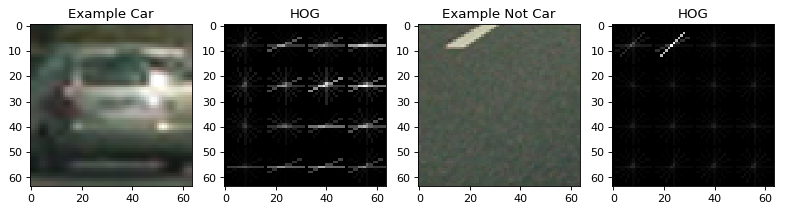

In [11]:
# Call our function with vis=True to see an image output
features, hog_image = ex.hog_feature(ex.RGB2GRAY(car_image),orient=8,pix_per_cell=16, cell_per_block=1, vis=True, feature_vec=False)
features, hog_image2 = ex.hog_feature(ex.RGB2GRAY(notcar_image),orient=8,pix_per_cell=16, cell_per_block=1, vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure(figsize=(12,3),dpi=80)
plt.subplot(141)
plt.imshow(car_image, cmap='gray')
plt.title('Example Car')
plt.subplot(142)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG')
plt.subplot(143)
plt.imshow(notcar_image, cmap='gray')
plt.title('Example Not Car')
plt.subplot(144)
plt.imshow(hog_image2, cmap='gray')

plt.title('HOG')

In [5]:
from sklearn.svm import SVC
from scipy.ndimage.measurements import label
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Training 
spatial = 32
histbin = 32
print("Extracting features.")
car_features = ex.extract_features(cars, dv.param)
notcar_features = ex.extract_features(notcars, dv.param)

print("Car feature sample shape {}".format(car_features[0].shape))
print("Not Car feature sample shape {}".format(notcar_features[0].shape))
print("Car features count is {}, Not Car feature counts is {}.".format(len(car_features),len(notcar_features)))
X = np.vstack((car_features, notcar_features))
X = X.astype(np.float64) 

X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
rand_state = np.random.randint(0, 100)
#Spilt Data 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
print('Using spatial binning of:',spatial,'and', histbin,'histogram bins.',' Feature vector length:', len(X_train[0]))

# Use a linear SVC as a Classifier
#svc = LinearSVC()
svc = SVC()
t=time.time()
# Train the Support Vector Machine 
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


Extracting features.


C:\Users\ChangHyun\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Car feature sample shape (944,)
Not Car feature sample shape (944,)
Car features count is 17584, Not Car feature counts is 17936.
Using spatial binning of: 32 and 32 histogram bins.  Feature vector length: 944
201.86 Seconds to train SVC...
Test Accuracy of SVC =  0.9927
My SVC predicts:  [ 0.  0.  0.  1.  0.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 0.  0.  0.  1.  0.  0.  1.  0.  1.  1.]
0.03705 Seconds to predict 10 labels with SVC


C:\Users\ChangHyun\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Slide windows count : 122. search window count : 14


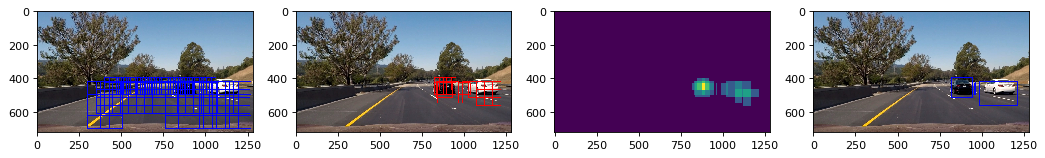

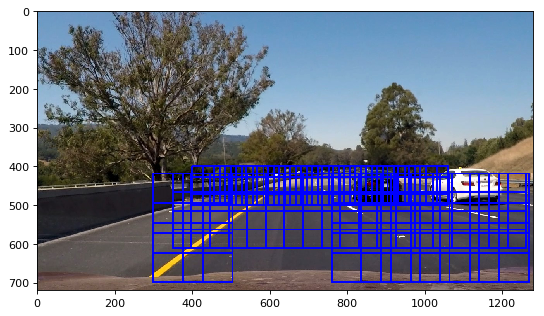

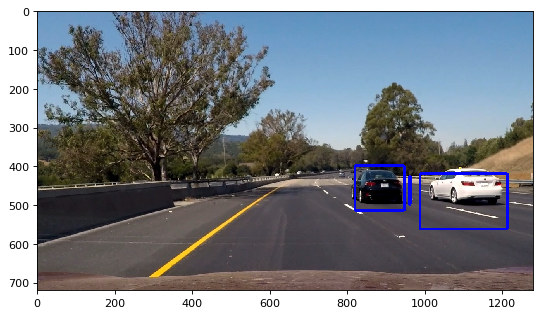

In [10]:
# Car detecting with Sliding Windows 
image = mpimg.imread( './test_images/test6.jpg')
#image = mpimg.imread( './test_images/screenshot2.jpg')

w1 = dt.slide_window(image, x_start_stop=[400, 1080], y_start_stop=[400, 520], xy_window=(72, 72), xy_overlap=(0.6, 0.6))                       
w2 = dt.slide_window(image, x_start_stop=[350, 1280], y_start_stop=[420, 650], xy_window=(96, 96), xy_overlap=(0.5, 0.5))                       
w3= dt.slide_window(image, x_start_stop=[760, 1280], y_start_stop=[420, 720], xy_window=(128, 128), xy_overlap=(0.4, 0.4))                     
w4= dt.slide_window(image, x_start_stop=[300, 520], y_start_stop=[420, 720], xy_window=(128, 128), xy_overlap=(0.4, 0.4))                     
windows = np.concatenate((w1,w2,w3,w4))
window_img = dt.draw_boxes(image, windows, color=(0, 0, 255), thick=3)
on_windows = dt.search_windows(image, windows, svc, X_scaler,dv.param)
on_window_img = dt.draw_boxes(image, on_windows, color=(255,0, 0), thick=3)
print("Slide windows count : {}. search window count : {}".format(len(windows),len(on_windows)))
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = dt.add_heat(heat,on_windows)
heat = dt.apply_threshold(heat,1)
heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)
#print("Heat after threshold : {}".format(heat))
#print("Heatmap shape {}, length {} , {} with labels : {}".format(np.shape(labels),len(labels), len(labels[0]),labels))
draw_img = dt.draw_labeled_bboxes(np.copy(image), labels) 

fig = plt.figure(figsize=(16,4),dpi=80)
plt.subplot(141)
plt.imshow(window_img)
plt.subplot(142)
plt.imshow(on_window_img)
plt.subplot(143)
plt.imshow(heatmap)
plt.subplot(144)
plt.imshow(draw_img) 

fig = plt.figure(figsize=(8,8),dpi=80)
plt.imshow(window_img)

fig = plt.figure(figsize=(8,8),dpi=80)
plt.imshow(draw_img)

